# Titanic

For this project, we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step-1: Exploratory Data Analysis (EDA)

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [6]:
# Check the missing data
# False = Data is not missing
# True = Data is missing
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Missing Data

We can use seaborn to create a simple heatmap to see where we have missing data!

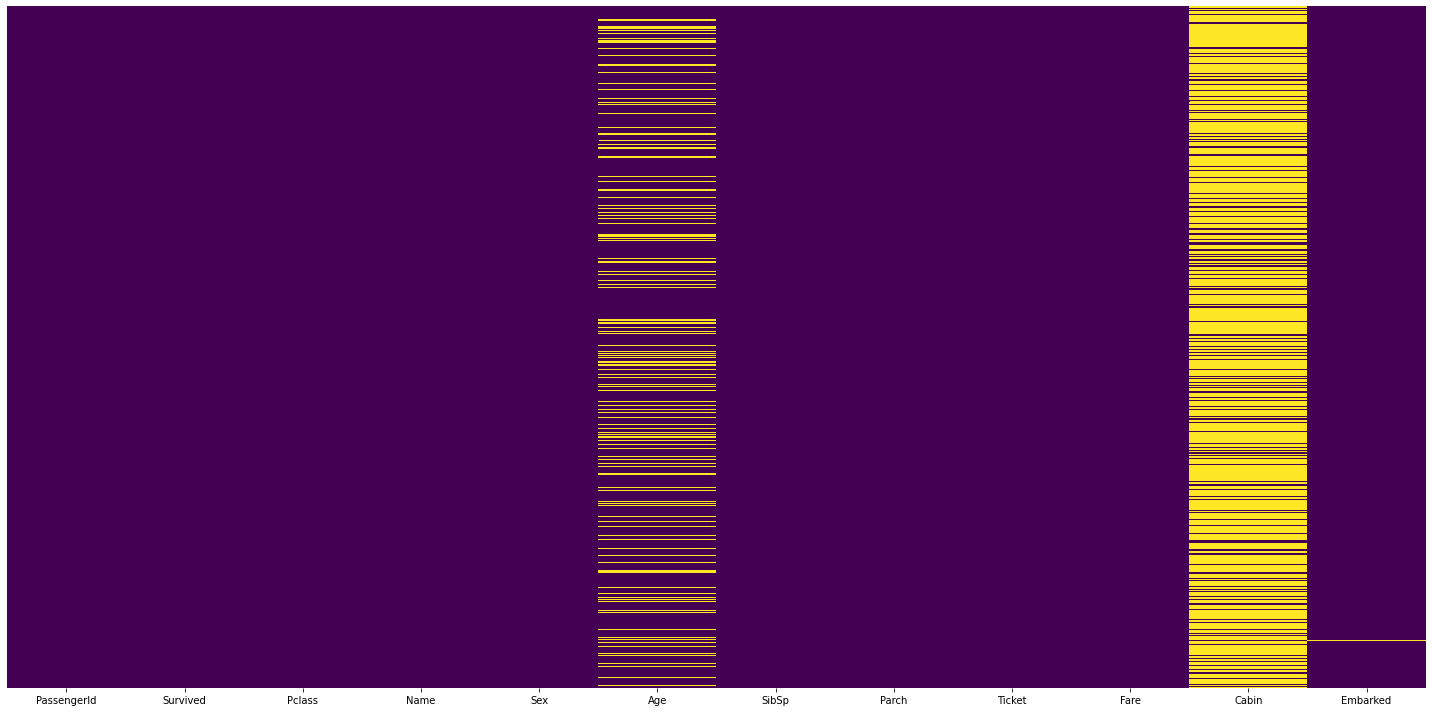

In [7]:
# Now creating the heatmap to check the missing data
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()

#### **Note:** In above plot we can see that, yellow bars are stand for missing data.

* Here missing some 'Age' information.
* And missing lots of 'Cabin' information.

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

In [8]:
# Total Survived people o the Titanic
train['Survived'].sum()

342

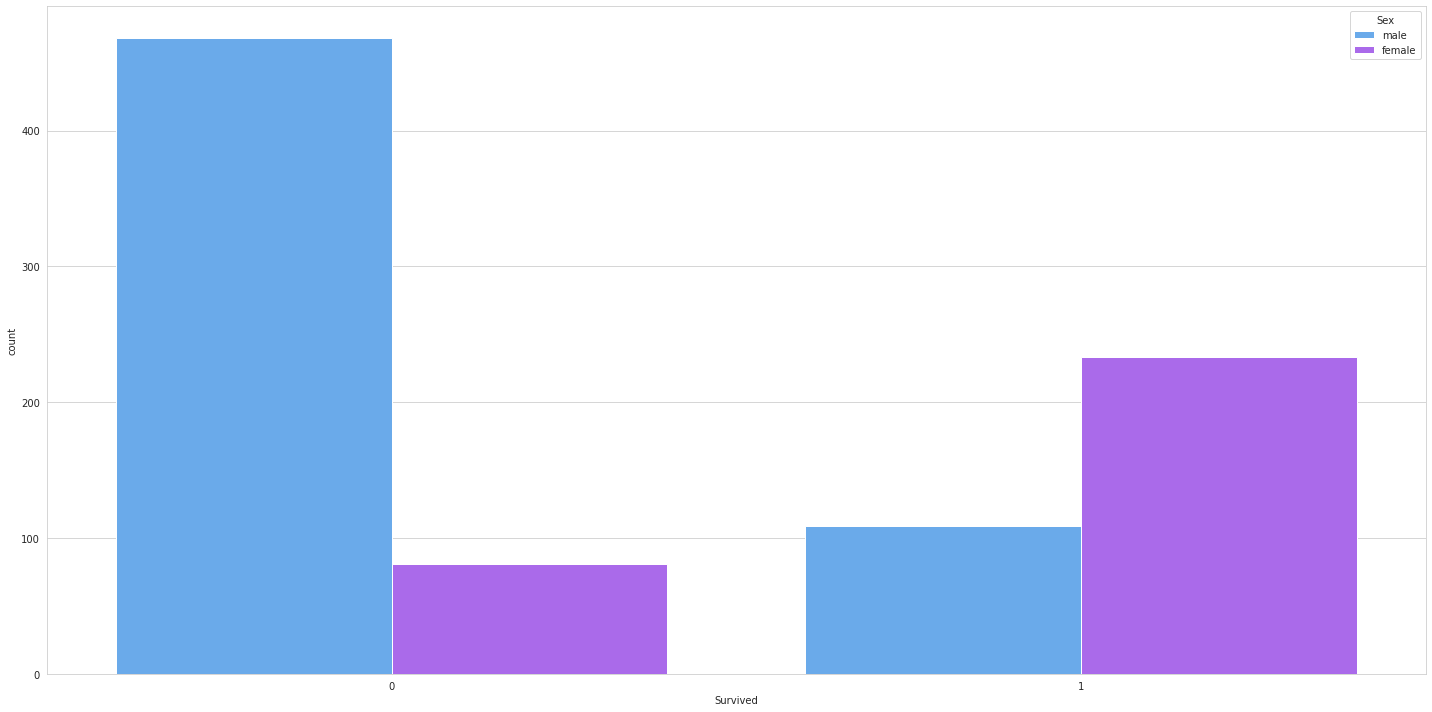

In [9]:
# Couting the number of people who is Survived and who is Not Survived.
# 1 - Survived
# 2- Not Survived

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='cool')
plt.tight_layout()

**NOTE: Females are more survived than that of Males**

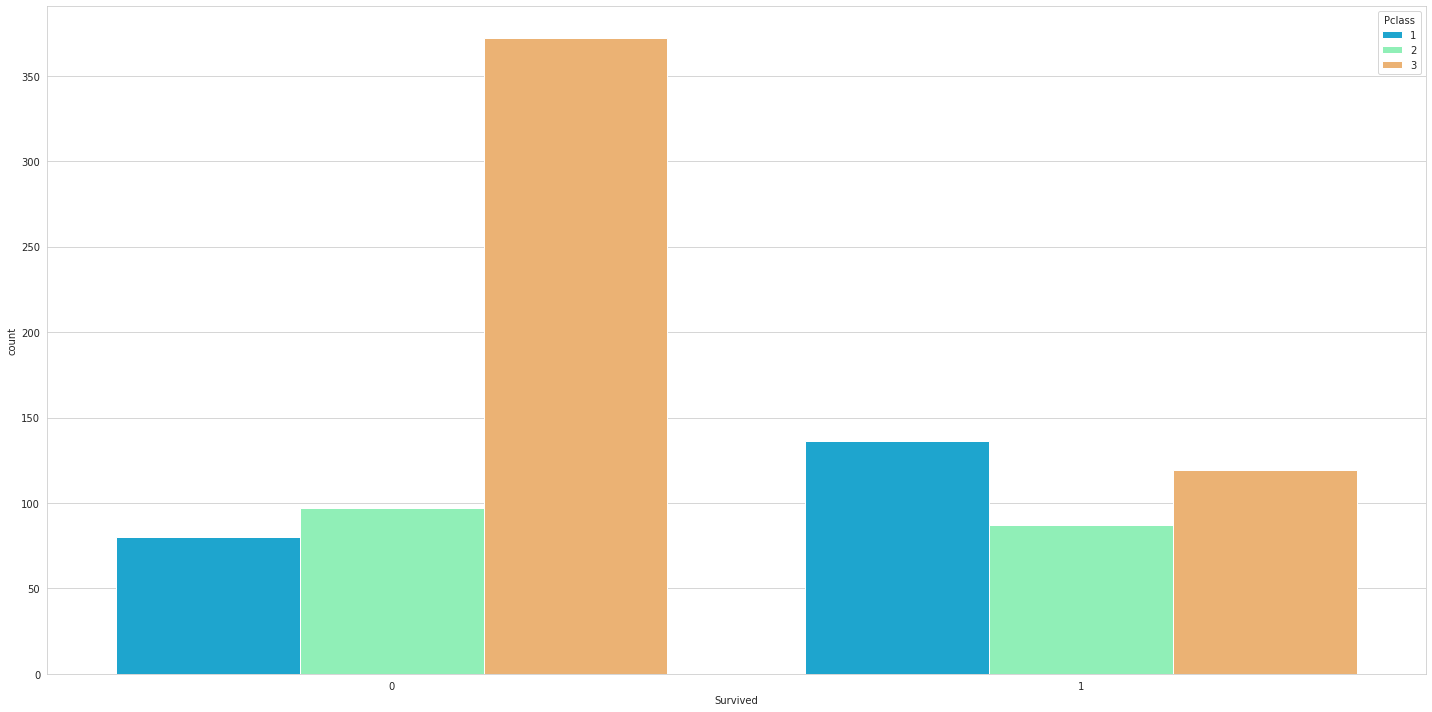

In [10]:
# Now check survival count over the Passenger Classes

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.tight_layout()

**NOTE: Higher class people are more survived than lower class (3rd class).**

### Now ckeck the age distribution of the passengers on the Titatic

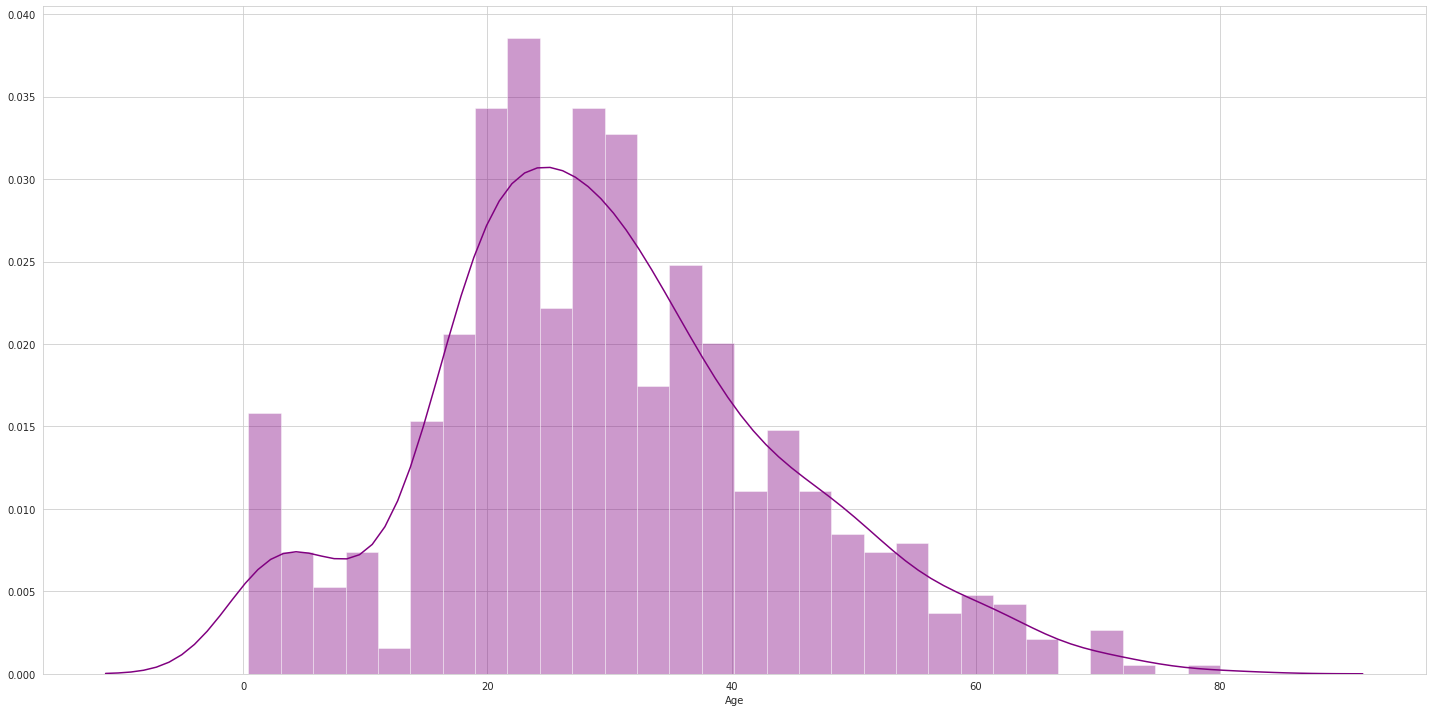

In [11]:
# Check the age distribution
# Drop the null values
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), bins=30, color='purple')
plt.tight_layout()

**NOTE**: In above graph we can also see that there are some children also of age-group 0-12 travell on the Titanic 

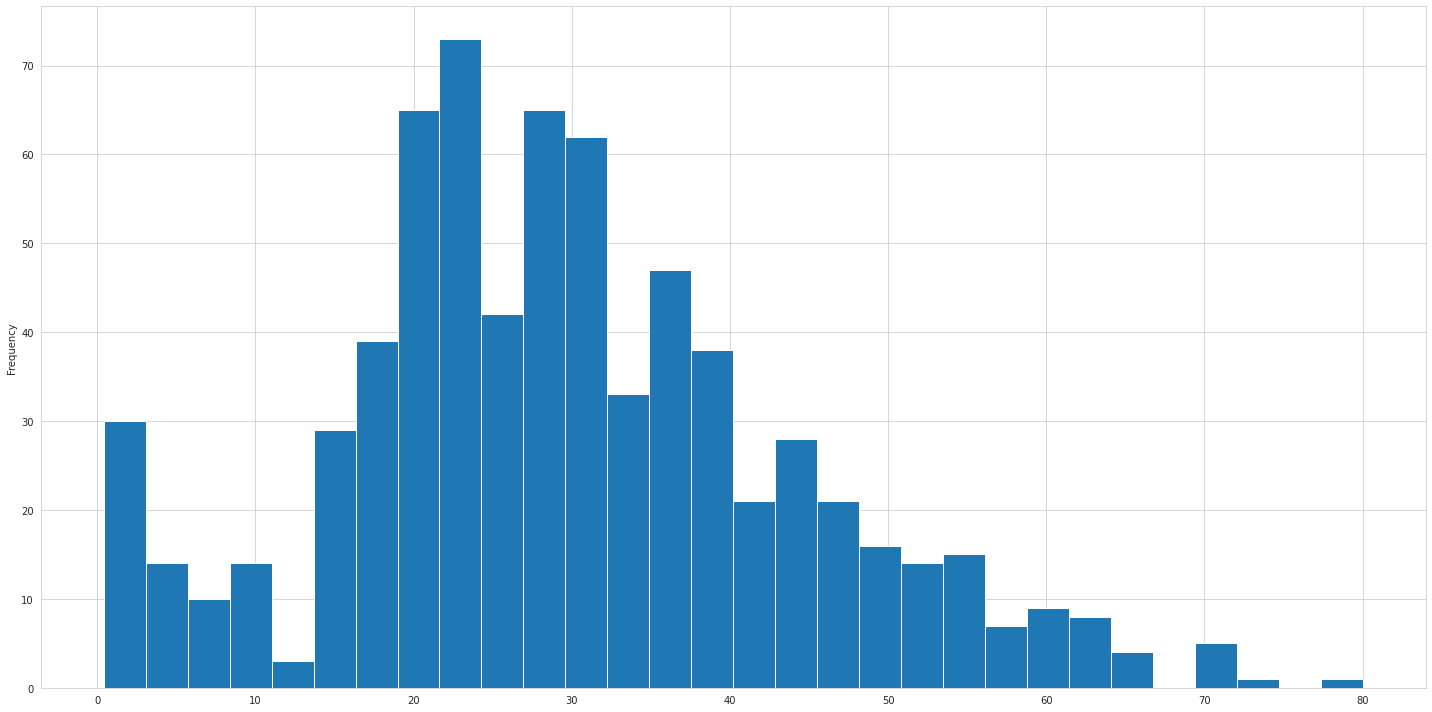

In [12]:
plt.figure(figsize=(20,10))
train['Age'].plot.hist(bins=30)
plt.tight_layout()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Now exploring the 'SibSp' colum (Siblings and Spouses on ship)

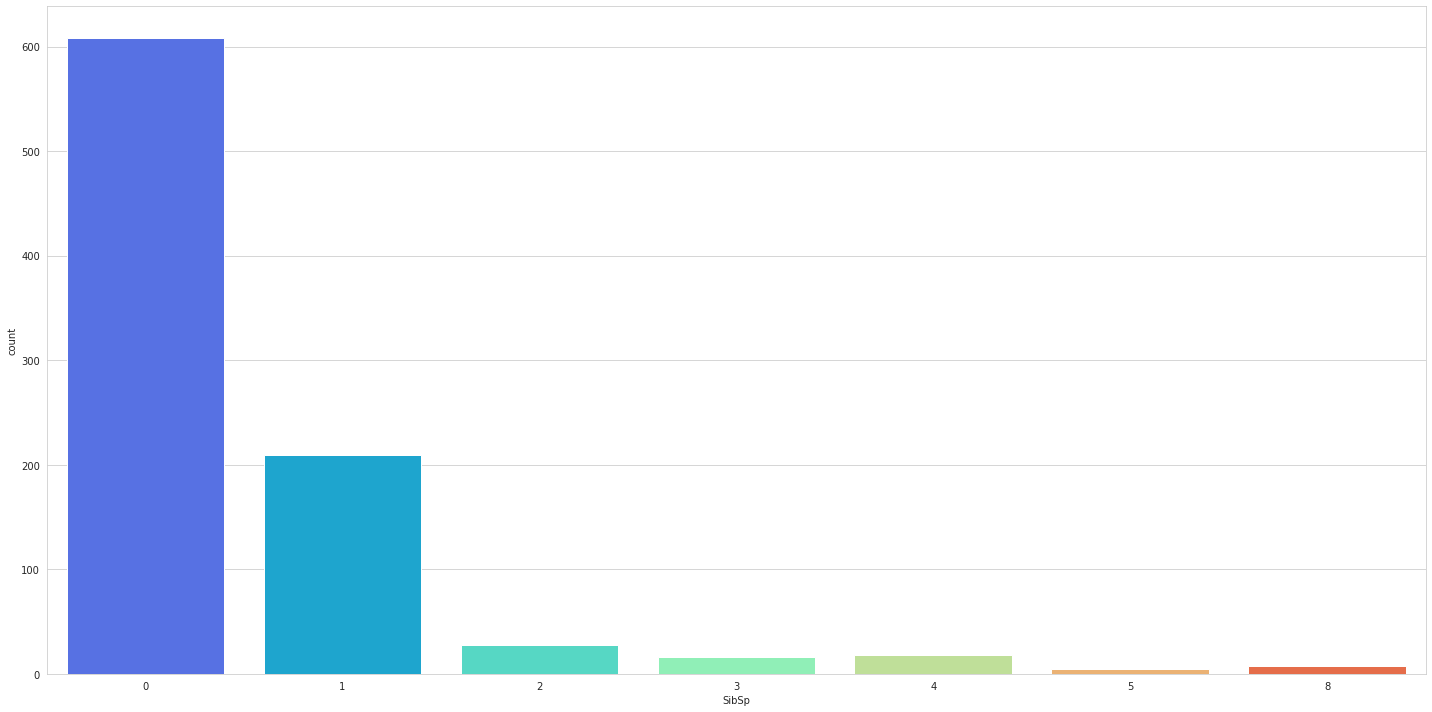

In [14]:
# Visualizing of sibilings and spouses on ship

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='SibSp' ,data=train, palette='rainbow')
plt.tight_layout()

### Vizualization Inferences:

* Most of the people onboard did not have neither children or a spouse.
* Second most popular option is just '1' which is most likely to be probably a spouse.
* There are lot of single people onboard.

### Now VIsusalize the distribution of fares.

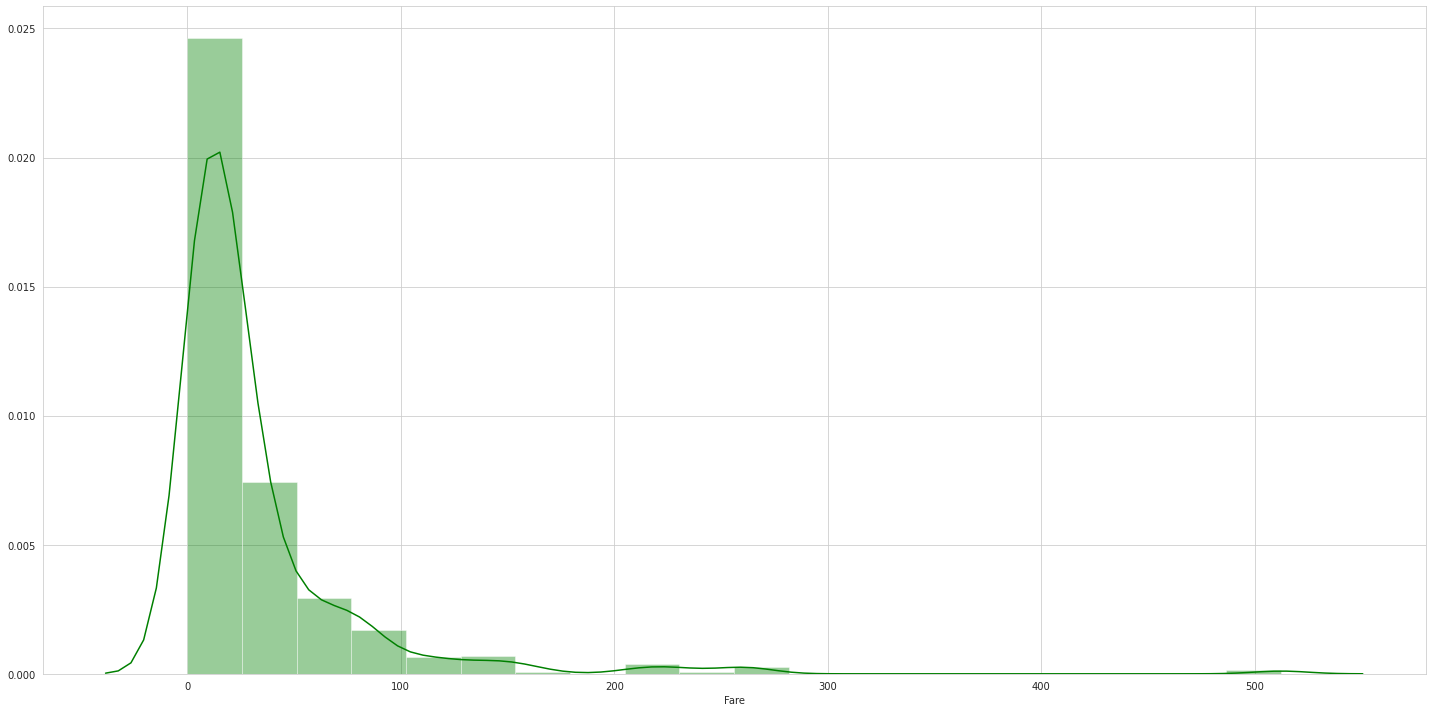

In [15]:
# Check the fare distribution
# Drop the null values
plt.figure(figsize=(20,10))
sns.distplot(train['Fare'].dropna(), bins=20, color='green')
plt.tight_layout()

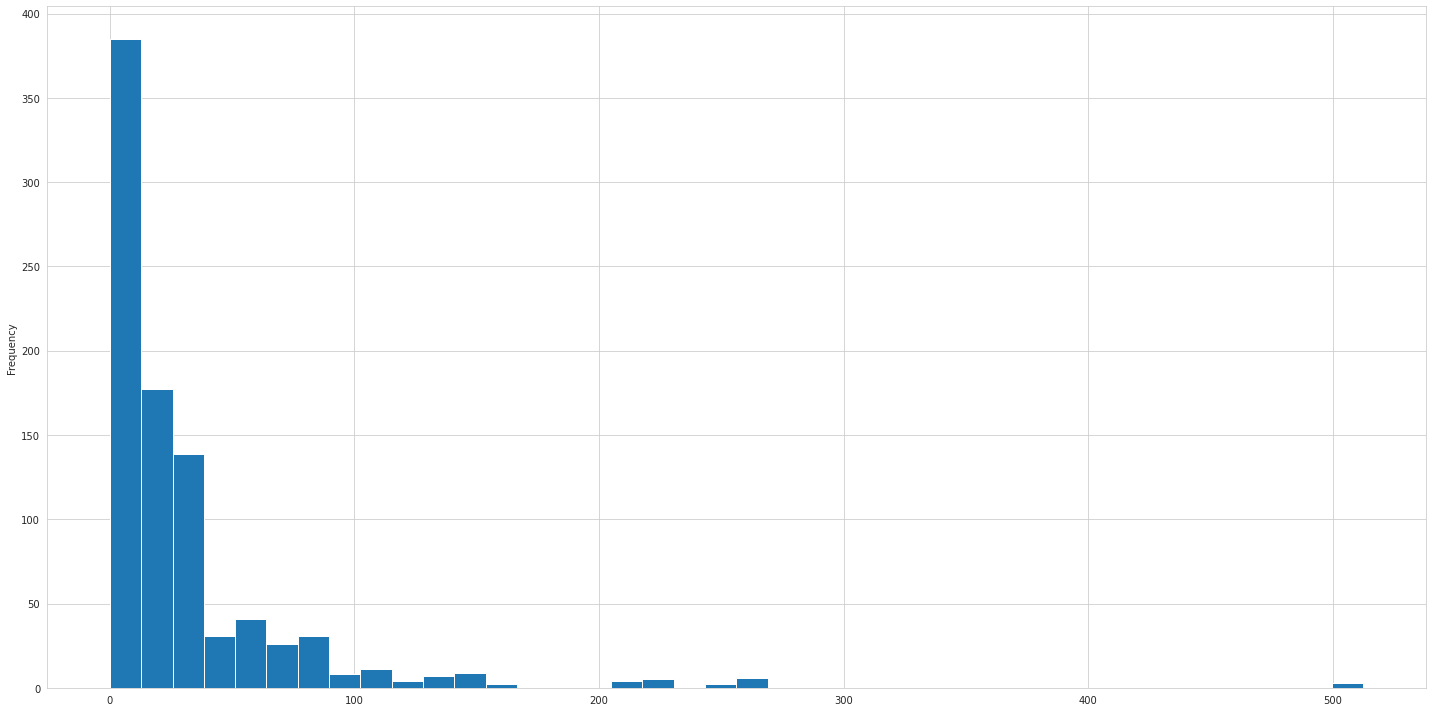

In [16]:
plt.figure(figsize=(20,10))
train['Fare'].plot.hist(bins=40)
plt.tight_layout()

* To see the above graph we can say that most of the most of the purchage prizes between 0 to 50.
* Distribution of fare is towards the cheaper tickets, because most of the passengers were in the cheaper 3<sup>rd</sup> class.

### Cufflinks for intractive plots

In [17]:
# Import cufflinks
import cufflinks as cf
# Operate cufflinks offline
cf.go_offline()

In [18]:
# Visualize the distribution of fare

train['Fare'].iplot(kind='hist', bins=50, color='green')

# Step-2: Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


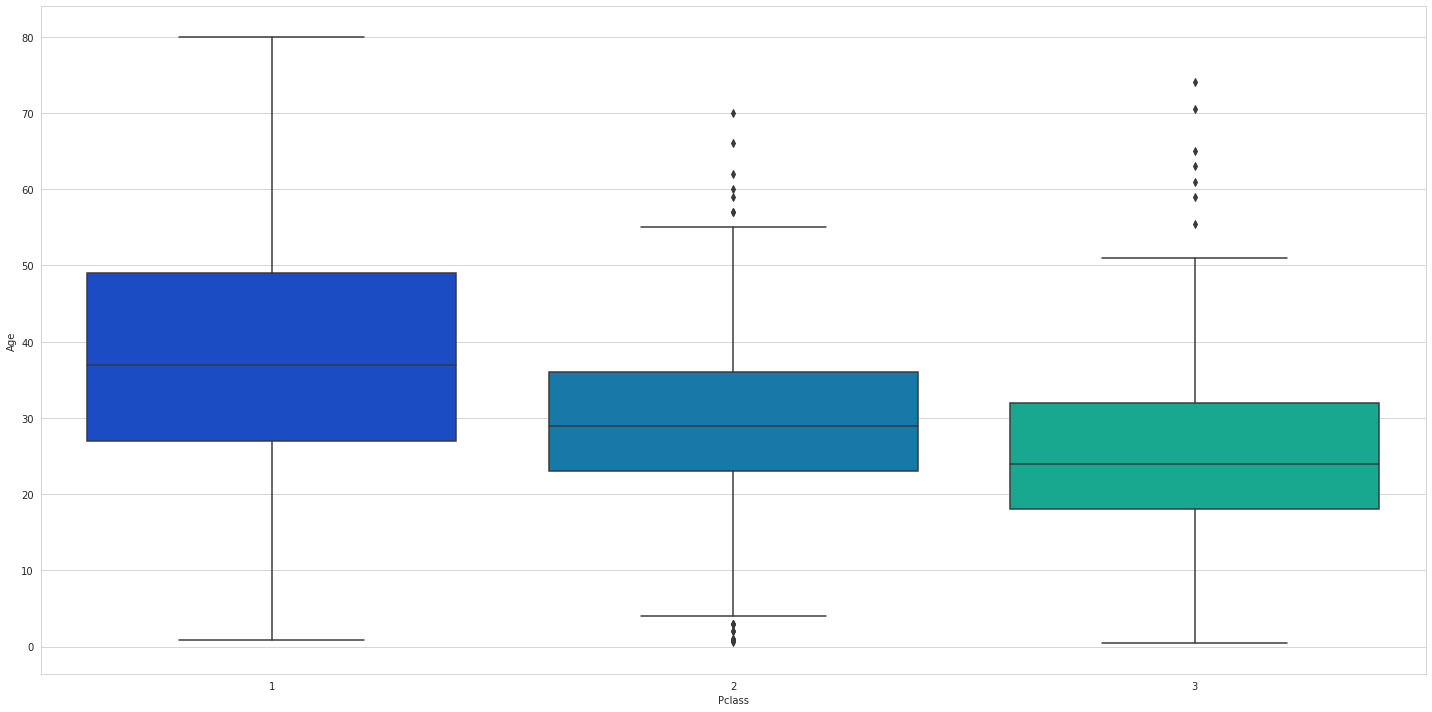

In [19]:
# Check out the boxplot of 'Age' and 'Pclass' columns

plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.tight_layout()

#### NOTE:
* We can see here that when we separate by class, wealthier passengers in the first class and second class tend to actually a bit older than passengers in the third class.

* We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [20]:
train[train['Pclass']==1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Calculate the mean of the age of the passengers from different Pclass

FirstCMean = train[train['Pclass']==1]['Age'].mean()
SecondCMean = train[train['Pclass']==2]['Age'].mean()
ThirdCMean = train[train['Pclass']==3]['Age'].mean()

print("Average age of the first class passengers is : ", FirstCMean)
print("Average age of the first class passengers is : ", SecondCMean)
print("Average age of the first class passengers is : ", ThirdCMean)


Average age of the first class passengers is :  38.233440860215055
Average age of the first class passengers is :  29.87763005780347
Average age of the first class passengers is :  25.14061971830986


In [22]:
# Define the function to impute the average age of the passengers of differnt Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return FirstCMean

        elif Pclass == 2:
            return SecondCMean

        else:
            return ThirdCMean

    else:
        return Age

In [23]:
# Now apply the impute_age() function
# Apply this function accross the column (that is axis=1)
# Now fill the missing data of 'Age'

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

* I have created a function here ***impute_age()*** that takes an argument ***cols*** and notice here that actually grab based off my index values 'Age' and 'Pclass'.
* I am able to do that because of I am using to apply these two columns('Age', 'Pclass').

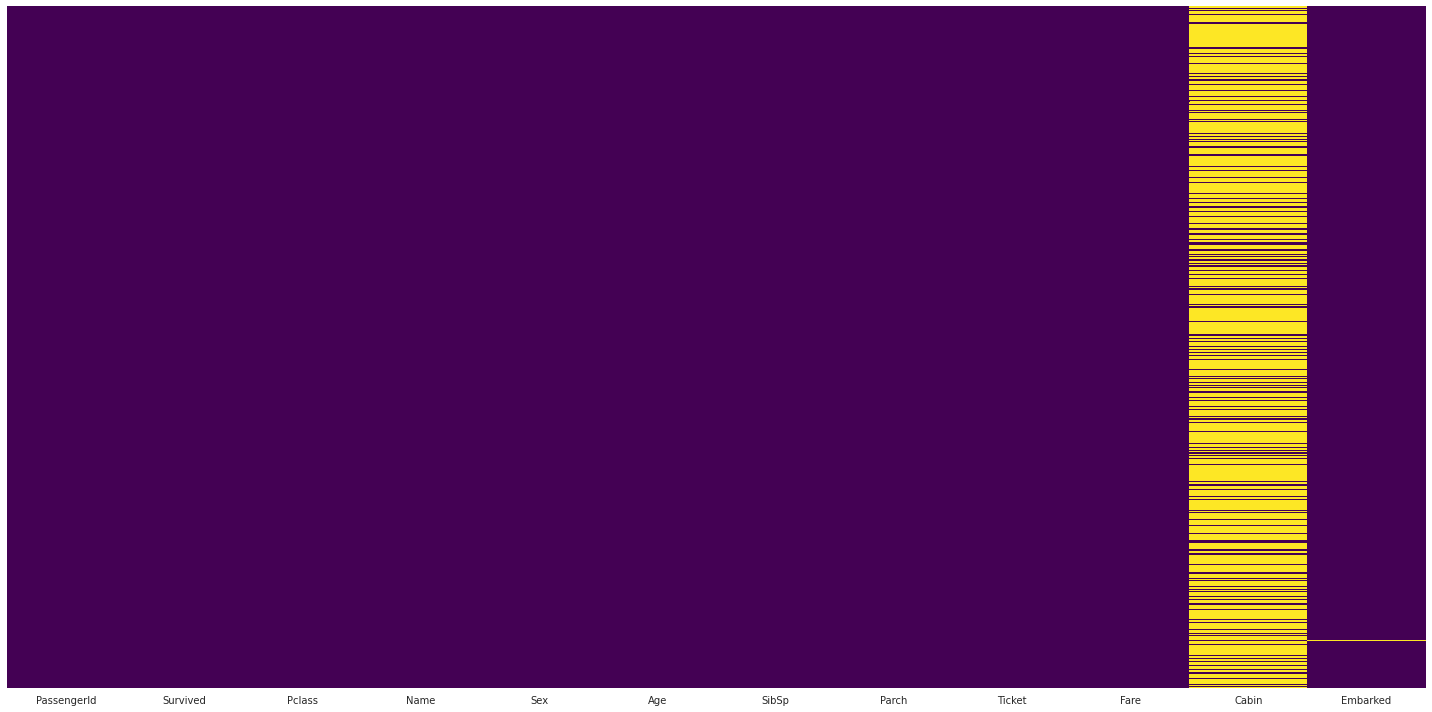

In [24]:
# Now check the heatmap again

plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()

In [25]:
# Now drop the cabin column from the data frame
train.drop('Cabin', axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [26]:
# Drop the missing value of Embarked
train.dropna(inplace=True)

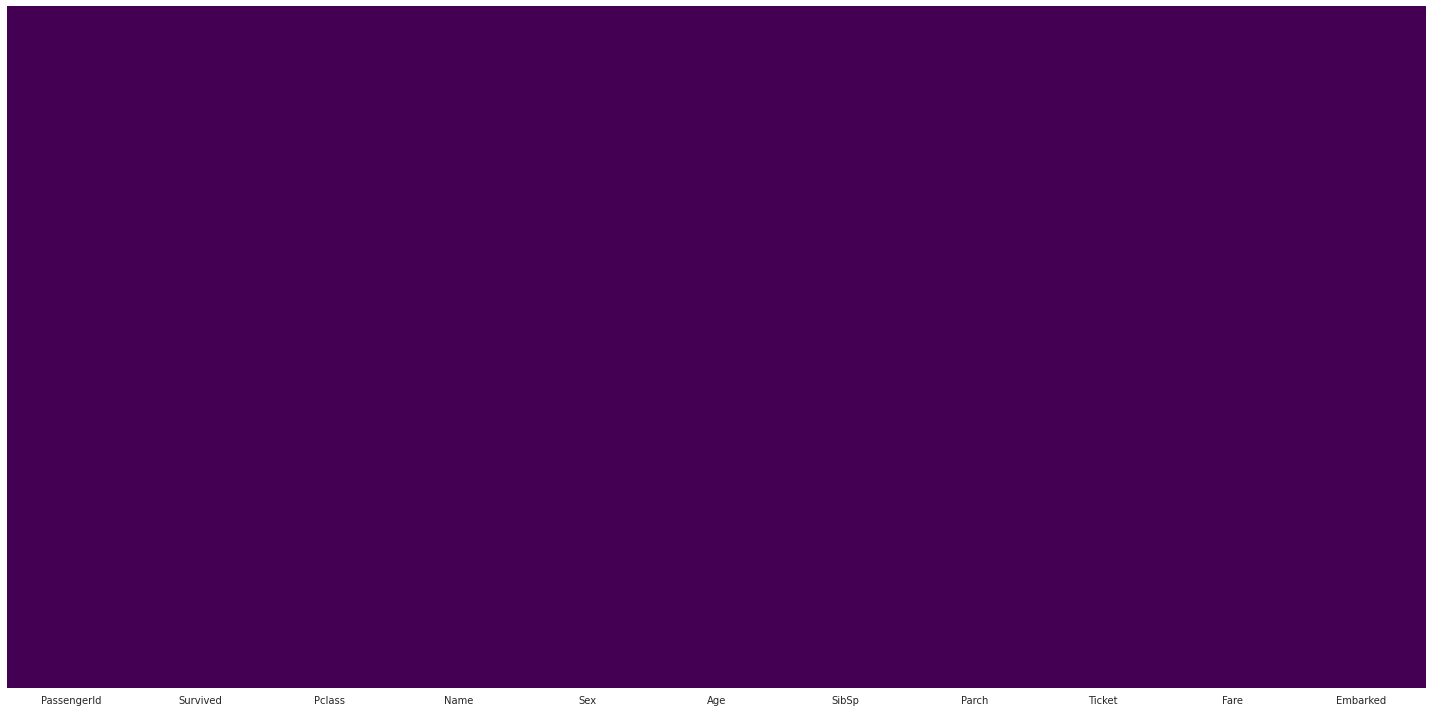

In [27]:
# Now check heatmap again
# And we can see that there is no missing value in our DataFrame

plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()

# Step-3 Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [30]:
# Covert the 'Sex' column into dummy variables
# It will return the sex value is 0 or 1 (0=Not male, 1=male)

sex = pd.get_dummies(train['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
# Check the unique values of 'Embarked' in the DataFrame
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
# Covert the 'Embarked' column into dummy variables
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
# Now add the new columns into the DataFrame
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [34]:
# Drop the columns which are not going to be use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [35]:
# Drop the 'PassengerId' column from the DataFrame
train.drop('PassengerId', axis=1, inplace=True)

In [36]:
# Now check our DataFrame
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


**Now our data is ready for our Logistic Regression model**

# Step-4: Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [37]:
# Data
# Dimension : 889x9
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


## 1. Separate the data into 'features values' and 'target values'

### X and y arrays

* **X array = features values  (Input Matrix)**
* **y array = target values  (Output Vector)**

In [38]:
# Check total columns in DataFrame
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [39]:
# Define 'Input Matrix'
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [40]:
# Define 'Output Vector'
y = train['Survived']

In [41]:
# Check 'Input Matrix'
# Dimension : 889x8
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [42]:
# Check 'Output Vector
# Dimension : 889x1
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## 2. Train Test Split

* Firsly we define our 'Input matrix' and 'Output vector'
* Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [43]:
# import the 'train_test_split model' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

In [44]:
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
# Data = (X, y)
# Training Data = (X_train, y_train)
# Testing Data = (X_test, y_test)
# test_size = 0.3 (30% of the whole data)
# random_state 101 (Specific set of random split on our data)

#### Check our training data

In [46]:
# Check 'training inputs matrix'
# Dimension: 622x8
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.00000,0,0,7.7750,0,0,1
651,2,18.00000,0,1,23.0000,0,0,1
2,3,26.00000,0,0,7.9250,0,0,1
690,1,31.00000,1,0,57.0000,1,0,1
196,3,25.14062,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.00000,0,0,13.0000,0,0,1
840,3,20.00000,0,0,7.9250,1,0,1
338,3,45.00000,0,0,8.0500,1,0,1
524,3,25.14062,0,0,7.2292,1,0,0


In [47]:
# Check 'training outputs vector'
# Dimension: 622x1
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

#### Check our testing data

In [48]:
# Check 'testing inputs matrix'
# Dimension: 267x8
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,25.140620,0,0,8.05,1,0,1
613,3,25.140620,0,0,7.75,1,1,0
615,2,24.000000,1,2,65.00,0,0,1
337,1,41.000000,0,0,134.50,0,0,0
718,3,25.140620,0,0,15.50,1,1,0
...,...,...,...,...,...,...,...,...
792,3,25.140620,8,2,69.55,0,0,1
828,3,25.140620,0,0,7.75,1,1,0
732,2,29.877630,0,0,0.00,1,0,1
669,1,38.233441,1,0,52.00,0,0,1


In [49]:
# Check 'testing outputs vector'
# Dimension: 267x1
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

## This is Multivariable Logistic Regression

**Number of Training Examples (m) = 622**

**Number of featurs (n) = 8**

## 3. Creating and Training the Model

In [50]:
# Now import the 'LogisticRegression' model from 'sklearn.linear_model'
from sklearn.linear_model import LogisticRegression

In [51]:
# Now creating the instences of LogisticRegression model
# Create a LogisticRegression object
logmodel = LogisticRegression()

In [52]:
print(dir(logmodel)) # print all the available methods on 'lm' (LinearRegression object)

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'class_weight', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


#### Now we are going to use the **fit()** method to train or fit my model on my training data

In [53]:
# fit (train) my model on my training data
logmodel.fit(X_train, y_train)

/home/manish/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Now our LinearRegression model has been trained successfully! on my training data

## 4. Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [54]:
# print the intercept
# intercep is the constant term of our hypothesis
logmodel.intercept_

array([5.00905803])

In [55]:
# Now check the coefficients which are associated with each feature of the training data
logmodel.coef_

array([[-1.13103596e+00, -4.18598806e-02, -2.49450280e-01,
        -8.43616168e-02,  1.72185786e-03, -2.48859439e+00,
         1.45571978e-01, -2.19937920e-01]])

**Now create a DataFrame based on these coefficients**

In [56]:
len(logmodel.coef_[0])

8

In [57]:
# Check input columns
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [58]:
# Creating a DataFrame 'cdf' in which:
# data = logmodel.coef_
# indices = X_train.columns
# columns ['Parameters']

cdf = pd.DataFrame(logmodel.coef_[0], X_train.columns, columns = ['Parameters'])

In [59]:
cdf

,Parameters
Pclass,-1.131036
Age,-0.041860
SibSp,-0.249450
Parch,-0.084362
Fare,0.001722
male,-2.488594
Q,0.145572
S,-0.219938


## 5. Now Analysing our matrics

* **n = 8**
* **m = 622**

* **Featur vector         = X_train.columns (Dimension: nx1 == 8x1)**
* **Parameter vector (θ)  = cdf (Dimensions: nx1 == 8x1)**
* **Design Matrix         = X_train (Dimension: mxn == 622x8)**
* **Output vector         = y_train (Dimension: mx1 == 622x1)**
* **Number of classes (P) = 2 (0 or 1)**

## Hypothesis:

* ### h(θ) = g(X) (sigmoid function)
* ### g(X) = 1/(1+exp(-θ<sup>T</sup>X)
* h(θ): Scaler Value

## 6. Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [60]:
# For pridictions we use the predict() method and pass X_test (test_set) as argument
# X_test Dimension: 267x5
# predictions Dimension: 267x1
predictions = logmodel.predict(X_test)

In [61]:
# Check the predictions
# it will return an array which size of as input size (size of X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [62]:
# Convert the predictions from array to Series
predicted_values = pd.Series(data = predictions)

In [63]:
# Check our predicted values
# Dimension : 267x1
predicted_values

0      0
1      0
2      1
3      1
4      0
      ..
262    0
263    0
264    0
265    1
266    1
Length: 267, dtype: int64

In [64]:
# Check actual values
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

## 7. Evaluating the Model

## Precision
<img src = "Precision.png" style = "width: 1500px" >

**When it predicts 'yes the person can survive', how often is it actually correct?**

## Recall
<img src = "Recall.png" style = "width: 1500px" >

**When it is actually yes the person can survive, how often does it predict correctly?**

## F1-Score
<img src = "F1_Score.png" style = "width: 1500px" >

**Weighted average between precision and recall. Useful when dealing with unbalanced samples or Skewed Classes**

## Accuracy
<img src = "Accuracy.png" style = "width: 1500px" >

**The sum of true positives and true negatives divided by the total number of samples. This is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance.**

## Micro - Average

* **In Micro-average method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.**
* **Micro-average of precision = (TP1+TP2)/(TP1+TP2+FP1+FP2)**
* **Micro-average of recall = (TP1+TP2)/(TP1+TP2+FN1+FN2)**
* **The Macro-average F-Score will be simply the harmonic mean of these two figures.**

## Macro - Average

* **In Macro-Average method just take the average of the precision and recall of the system on different sets.**
* **Macro-average precision = (P1+P2)/2**
* **Macro-average recall = (R1+R2)/2**
* **The Macro-average F-Score will be simply the harmonic mean of these two figures.**

### Suitability

**Macro-average method can be used when you want to know how the system performs overall across the sets of data. You should not come up with any specific decision with this average.**

**Note: On the other hand, micro-average can be a useful measure when your dataset varies in size.**

In [65]:
# import 'confusion_matrix' model from 'sklearn.metrics'
from sklearn.metrics import confusion_matrix

In [66]:
# Generate the 'confution matrix'
confusion_matrix(y_test, predicted_values)

array([[149,  14],
       [ 31,  73]])

In [67]:
# import 'classification_report' model from 'sklearn.metrics'
from sklearn.metrics import classification_report

In [68]:
# Generate the classcification report
cf_report = classification_report(y_test, predicted_values)
print(cf_report)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



**Roughly, we can say that our model is 83% accurate.**

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!